# **1. Importing the Basic Libraries**

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **2. Reading the dataset**

This is crucial for EDA as it provides the initial step to understand the data structure, format, and overall content, enabling subsequent analysis

In [113]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [114]:
df.shape

(9240, 37)

## **2.1 Basic Statistics of the Numerical Variables**

This offers insights into the dispersion, and shape of the numerical features, aiding in identifying patterns, outliers, and potential areas for further investigation

In [115]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## **2.2 Checking for the Null Values within the dataset**

This is important to ensure `data completeness` and reliability, as missing values can impact analysis accuracy and inform decisions on data imputation or exclusion.

In [117]:
(df.isnull().mean() * 100).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

<Axes: >

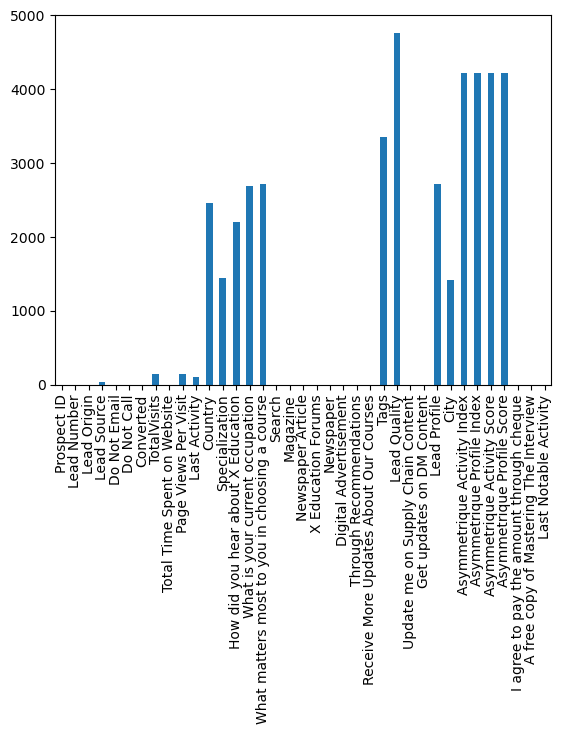

In [118]:
df.isnull().sum().plot.bar()

## **2.3 Analysing the values present in the dataset**

Analyzing dataset values is vital for EDA, providing insights into `variable distributions` and patterns, aiding in the identification of `outliers` and relationships.

In [119]:
for i in df.columns:
    name = df[i].unique()
    print(i, name)
    print("*" * 50)

Prospect ID ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']
**************************************************
Lead Number [660737 660728 660727 ... 579545 579538 579533]
**************************************************
Lead Origin ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
**************************************************
Lead Source ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
**************************************************
Do Not Email ['No' 'Yes']
**************************************************
Do Not 

##### ***Evaluating the count of values assigned to each data point in columns with null values.***


In [120]:
null_var = ['Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Lead Profile', 'City']


In [121]:
for i in null_var:
    print(i)
    print('-'*10)
    print(df[i].value_counts())
    print('*'*90)
    print()


Country
----------
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                 

In [122]:
df['What is your current occupation'] = df['What is your current occupation'].replace('Select', np.nan)

In [123]:
df['What is your current occupation'] = df['What is your current occupation'].fillna('None')

In [124]:
df['What is your current occupation'].value_counts()

Unemployed              5600
None                    2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### ***Dropping columns with either a single value or an excessive number of null values, thus removing columns with more than 25% null values since 'select' is considered equivalent to null.***

In [125]:


drop_col = ['Prospect ID', 'Lead Number', 'Magazine', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
           'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
           'Receive More Updates About Our Courses',
           'Update me on Supply Chain Content',
           'Get updates on DM Content',
            'What matters most to you in choosing a course',
           'I agree to pay the amount through cheque',
           'Country',
           'How did you hear about X Education',
           'Specialization',
           'Tags',
           'Lead Profile',
           'City']



In [126]:
for col in drop_col:
    df = df.drop(col, axis = 1)

In [127]:
df.shape

(9240, 18)

In [128]:
for i in df.columns:

    print(df.groupby(i)['Converted'].sum())
    print('-'*15)
    print()

Lead Origin
API                        1115
Landing Page Submission    1768
Lead Add Form               664
Lead Import                  13
Quick Add Form                1
Name: Converted, dtype: int64
---------------

Lead Source
Click2call              3
Direct Traffic        818
Facebook               13
Google               1147
Live Chat               2
NC_EDM                  1
Olark Chat            448
Organic Search        436
Pay per Click Ads       0
Press_Release           0
Reference             490
Referral Sites         31
Social Media            1
WeLearn                 1
Welingak Website      140
bing                    1
blog                    0
google                  0
testone                 0
welearnblog_Home        0
youtubechannel          0
Name: Converted, dtype: int64
---------------

Do Not Email
No     3443
Yes     118
Name: Converted, dtype: int64
---------------

Do Not Call
No     3559
Yes       2
Name: Converted, dtype: int64
---------------

Converted

In [129]:
df.isnull().sum()

Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                             103
What is your current occupation             0
Search                                      0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [130]:
df.shape

(9240, 18)

##### ***Removing the rows that contains null values.***


In [131]:
df = df.dropna(subset = df.columns.to_list())
df.shape

(9074, 18)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Do Not Call                             9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Search                                  9074 non-null   obje

In [133]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,Modified


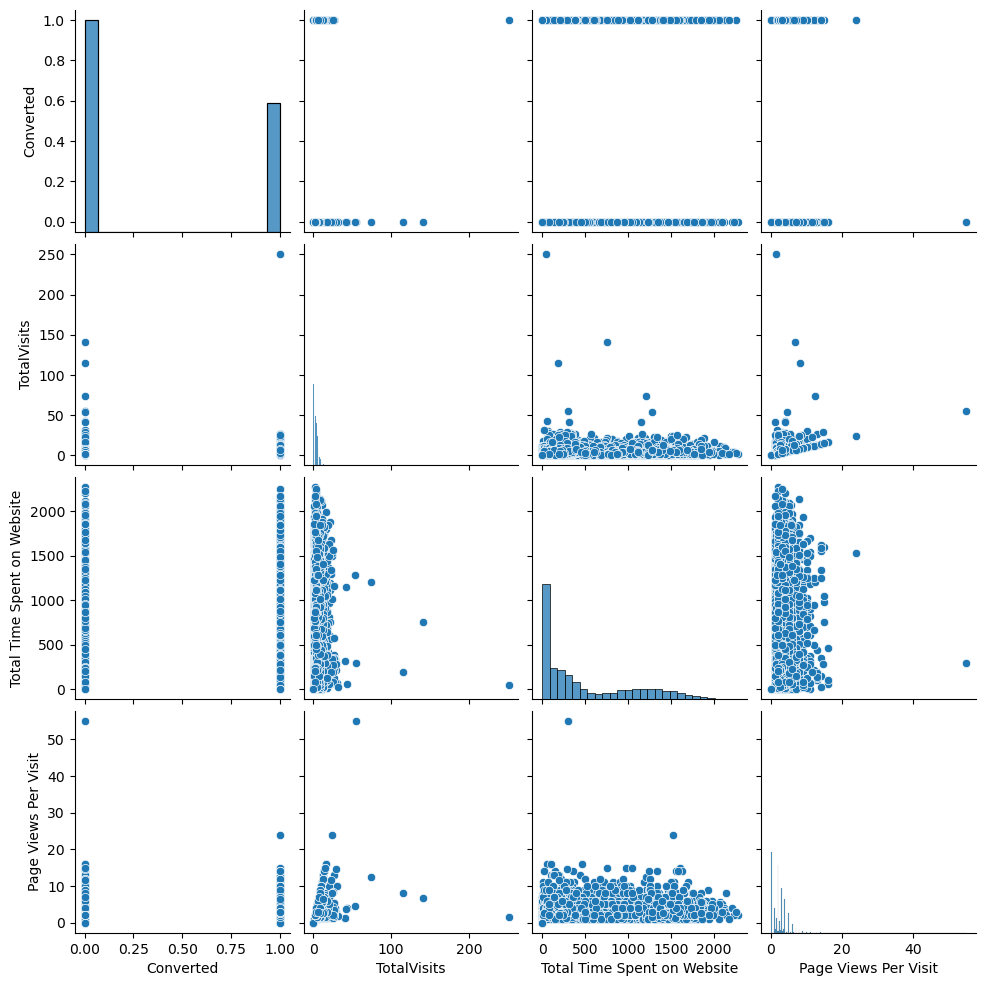

In [134]:
sns.pairplot(df)

In [135]:
# for i in df.columns:
#     j = 1
#     plt.subplot(14,2,j)
#     plt.figure(figsize = (6,6))
#     print(df.groupby(i)['Converted'].sum().plot.barh())
#     j += 1
#     plt.show()


In [136]:
change_feat = ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
              'Through Recommendations', 'A free copy of Mastering The Interview', ]

##### ***Transforming `'Yes/No'` to `'0/1'` for binary categorical variables enhances compatibility with numerical operations, facilitating streamlined analysis in subsequent code..***


In [137]:
def convert(x):
    return x.map({'Yes':1, 'No':0})

df[change_feat] = df[change_feat].apply(convert)

In [138]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,0,0,0,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,0,0,0,0,0,0,Modified


## **2.4 Creating Dummy Variables for Categorical Columns**

Creating dummy variables converts categorical data into a format `compatible with machine learning`, facilitating effective model training.

In [139]:
origin = pd.get_dummies(df['Lead Origin'], prefix = 'origin', drop_first = True)

df = pd.concat((df, origin), axis = 1)

In [140]:
df.drop('Lead Origin', axis =1, inplace = True)

In [141]:
df.head()

,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,origin_Landing Page Submission,origin_Lead Add Form,origin_Lead Import
0,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,0,0,0,0,0,Modified,0,0,0
1,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,0,0,0,0,0,0,Email Opened,0,0,0
2,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,0,0,0,0,0,0,1,Email Opened,1,0,0
3,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,0,0,0,0,0,0,0,Modified,1,0,0
4,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,0,0,0,0,0,0,Modified,1,0,0


In [142]:
source = pd.get_dummies(df['Lead Source'], prefix = 'source', drop_first = True)

df = pd.concat((df, source), axis = 1)
df.drop('Lead Source', axis =1, inplace = True)

In [143]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Newspaper Article,...,source_Referral Sites,source_Social Media,source_WeLearn,source_Welingak Website,source_bing,source_blog,source_google,source_testone,source_welearnblog_Home,source_youtubechannel
0,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,Email Opened,Student,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,Unreachable,Unemployed,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
activity = pd.get_dummies(df['Last Activity'], prefix = 'last_activity', drop_first = True)

df = pd.concat((df, activity), axis = 1)
df.drop('Last Activity', axis =1, inplace = True)

In [145]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Search,Newspaper Article,X Education Forums,...,last_activity_Form Submitted on Website,last_activity_Had a Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited on Website,last_activity_Resubscribed to emails,last_activity_SMS Sent,last_activity_Unreachable,last_activity_Unsubscribed,last_activity_View in browser link Clicked,last_activity_Visited Booth in Tradeshow
0,0,0,0,0.0,0,0.0,Unemployed,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,Unemployed,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,Student,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,Unemployed,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,2.0,1428,1.0,Unemployed,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
notable_activity = pd.get_dummies(df['Last Notable Activity'], prefix = 'Notable_Activity', drop_first = True)

df = pd.concat((df, notable_activity), axis = 1)
df.drop('Last Notable Activity', axis =1, inplace = True)

In [147]:
special = pd.get_dummies(df['What is your current occupation'], prefix = 'occupation')
special = special.drop('occupation_None', axis = 1)
df = pd.concat((df, special), axis = 1)
df.drop('What is your current occupation', axis =1, inplace = True)
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Notable_Activity_SMS Sent,Notable_Activity_Unreachable,Notable_Activity_Unsubscribed,Notable_Activity_View in browser link Clicked,occupation_Businessman,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## **2.5 Splitting Data into `Testing Data Set` and `Training Data Set`**

Splitting data into testing and training sets is essential for model evaluation and performance assessment in machine learning. 

**This process ensures that the model is trained on `one subset of the data` and tested on another, `providing a reliable measure of its generalization capabilities`.**

In [148]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df,train_size = 0.7, random_state = 100)

In [149]:
df_train.shape

(6351, 73)

In [150]:
df_test.shape

(2723, 73)

In [151]:
X_train = df_train.drop('Converted', axis = 1)
y_train = df_train['Converted']

In [152]:
X_train.shape

(6351, 72)

In [153]:
y_train = y_train.values.reshape(-1)

In [154]:
y_train.shape

(6351,)

####  ***Scaling the dataset.***

Scaling the dataset involves `normalizing or standardizing the numeric features`, ensuring they are on a consistent scale. This is crucial for many machine learning algorithms that are sensitive to the magnitude of input variables, promoting improved model performance and convergence.


In [155]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [156]:
X_train[X_train.columns.to_list()] = scaler.fit_transform(X_train[X_train.columns.to_list()])


In [157]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Notable_Activity_SMS Sent,Notable_Activity_Unreachable,Notable_Activity_Unsubscribed,Notable_Activity_View in browser link Clicked,occupation_Businessman,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional
count,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,...,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.078885,0.000315,0.013831,0.217585,0.099046,0.001575,0.000315,0.000157,0.000157,0.000472,...,0.244371,0.004094,0.004409,0.000157,0.000945,0.001102,0.001575,0.022201,0.605574,0.075894
std,0.269581,0.017744,0.020602,0.244868,0.087462,0.039653,0.017744,0.012548,0.012548,0.021731,...,0.429747,0.063857,0.066257,0.012548,0.030724,0.033184,0.039653,0.147349,0.488766,0.264849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.003984,0.004492,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.011952,0.110961,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.019920,0.413522,0.138750,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [158]:
# plt.figure(figsize = (15,15))
# sns.heatmap(X_train.corr(), annot = True, cmap = 'RdYlGn')

## **2.6 Running the `first` training model**


In [160]:
import statsmodels
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logml = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6281
Model Family:                Binomial   Df Model:                           69
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2479.0
Date:                Tue, 19 Dec 2023   Deviance:                       4958.0
Time:                        10:09:32   Pearson chi2:                 6.11e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4244
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            22.5662   7.97e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                     -1.6364      0.228     -7.189      0.000      -2.083      -1.190
Do Not Call                                      23.0247   5.41e+04      0.000      1.000   -1.06e+05    1.06e+05
TotalVisits                                       9.9925      2.467      4.050      0.000       5.157      14.828
Total Time Spent on Website                       4.6615      0.172     27.072      0.000       4.324       4.999
Page Views Per Visit                             -1.2885      0.606     -2.124      0.034      -2.477      -0.100
Search                                           -0.0366      0.931     -0.039      0.969      -1.862       1.788
Newspaper Article                                24.0264   7.84e+04      0.000      1.000   -1.54e+05    1.54e+05
X Education Forums                              -46.6534   1.12e+05     -0.000      1.000   -2.19e+05    2.19e+05
Newspaper                                       -25.3968   7.94e+04     -0.000      1.000   -1.56e+05    1.56e+05
Digital Advertisement                             0.0605      1.501      0.040      0.968      -2.881       3.002
Through Recommendations                           0.7954      1.652      0.482      0.630      -2.442       4.033
A free copy of Mastering The Interview           -0.0329      0.110     -0.300      0.764      -0.248       0.182
origin_Landing Page Submission                   -0.2134      0.109     -1.961      0.050      -0.427      -0.000
origin_Lead Add Form                             -0.7228      1.725     -0.419      0.675      -4.104       2.658
origin_Lead Import                               24.9421   7.87e+04      0.000      1.000   -1.54e+05    1.54e+05
source_Direct Traffic                            -3.1288      2.159     -1.449      0.147      -7.360       1.102
source_Facebook                                 -26.7809   7.87e+04     -0.000      1.000   -1.54e+05    1.54e+05
source_Google                                    -2.7940      2.157     -1.295      0.195      -7.022       1.434
source_Live Chat                                 21.7857   5.64e+04      0.000      1.000   -1.11e+05    1.11e+05
source_NC_EDM                                    21.6779   7.87e+04      0.000      1.000   -1.54e+05    1.54e+05
source_Olark Chat                                -1.7271      2.151     -0.803      0.422      -5.943       2.489
source_Organic Search                            -3.0821      2.160     -1.427      0.154      -7.315       1.151
source_Pay per Click Ads                        -24.7483      8e+04     -0.000      1.000   -1.57e+05    1.57e+05
sourc

## **2.7 `Recursive Feature Elimination`**

Recursive Feature Elimination (RFE) is a technique used for feature selection. It recursively removes features, fits the model, and ranks the features based on their importance.


In [161]:
# selecting top features using RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(estimator = logreg, n_features_to_select = 25)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 7),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 46),
 ('Newspaper Article', False, 17),
 ('X Education Forums', False, 35),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 42),
 ('Through Recommendations', False, 31),
 ('A free copy of Mastering The Interview', False, 47),
 ('origin_Landing Page Submission', False, 24),
 ('origin_Lead Add Form', True, 1),
 ('origin_Lead Import', True, 1),
 ('source_Direct Traffic', False, 11),
 ('source_Facebook', False, 30),
 ('source_Google', False, 15),
 ('source_Live Chat', False, 29),
 ('source_NC_EDM', False, 5),
 ('source_Olark Chat', True, 1),
 ('source_Organic Search', False, 14),
 ('source_Pay per Click Ads', False, 27),
 ('source_Press_Release', False, 40),
 ('source_Reference', True, 1),
 ('source_Referral Sites', False, 13),
 ('source_Social Media', False, 16),
 ('source_WeLearn', False, 48),
 ('so

In [162]:
col = X_train.columns[rfe.support_]

In [163]:
X_train_sm = sm.add_constant(X_train[col])
logreg = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model = logreg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2519.7
Date:                Tue, 19 Dec 2023   Deviance:                       5039.5
Time:                        10:09:39   Pearson chi2:                 6.17e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4170
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.7600      0.135    -13.014      0.000      -2.025      -1.495
Do Not Email                                -1.6388      0.203     -8.068      0.000      -2.037      -1.241
TotalVisits                                  9.2393      2.390      3.865      0.000       4.554      13.924
Total Time Spent on Website                  4.6771      0.170     27.438      0.000       4.343       5.011
Page Views Per Visit                        -1.5539      0.576     -2.699      0.007      -2.682      -0.426
Newspaper                                  -24.5852   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
origin_Lead Add Form                         1.8475      0.920      2.007      0.045       0.043       3.652
origin_Lead Import                           1.3227      0.462      2.861      0.004       0.417       2.229
source_Olark Chat                            1.3651      0.127     10.731      0.000       1.116       1.614
source_Reference                             1.8209      0.944      1.930      0.054      -0.028       3.670
source_Welingak Website                      3.8462      1.170      3.289      0.001       1.554       6.138
last_activity_Converted to Lead             -1.1787      0.235     -5.025      0.000      -1.638      -0.719
last_activity_Email Bounced                 -1.2966      0.426     -3.042      0.002      -2.132      -0.461
last_activity_Had a Phone Conversation       1.7609      0.779      2.261      0.024       0.235       3.287
last_activity_Olark Chat Conversation       -1.3035      0.195     -6.701      0.000      -1.685      -0.922
Notable_Activity_Email Link Clicked         -1.7756      0.261     -6.793      0.000      -2.288      -1.263
Notable_Activity_Email Opened               -1.3451      0.090    -14.916      0.000      -1.522      -1.168
Notable_Activity_Modified                   -1.6020      0.102    -15.637      0.000      -1.803      -1.401
Notable_Activity_Olark Chat Conversation    -1.3309      0.383     -3.473      0.001      -2.082      -0.580
Notable_Activity_Page Visited on Website    -1.8386      0.218     -8.443      0.000      -2.265      -1.412
occupation_Businessman                       2.2495      1.111      2.025      0.043       0.072       4.427
occupation_Housewife                        23.7222   1.59e+04      0.001      0.999   -3.11e+04    3.12e+04
occupation_Other                             1.8967      0.714      2.657      0.008       0.498       3.296
occupation_Student                           1.2598      0.234      5.381      0.000       0.801       1.719
occupation_Unemployed                        1.1646      0.090     12.934      0.000       0.988       1.341
occupation_Working Professional

## **2.8 Variance Inflation Factor**

The `Variance Inflation Factor (VIF)` is used to identify the presence of ***`multicollinearity`*** in a regression analysis. It measures how much the variance of an estimated regression coefficient increases if your predictors are correlated.

In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
6,origin_Lead Add Form,58.28
9,source_Reference,45.65
10,source_Welingak Website,15.23
0,const,14.73
17,Notable_Activity_Modified,2.04
8,source_Olark Chat,2.00
4,Page Views Per Visit,1.96
14,last_activity_Olark Chat Conversation,1.79
12,last_activity_Email Bounced,1.72
1,Do Not Email,1.72


In [165]:
# let's drop some columns based on its p-value high p-value means the variable is not significant.
col1 = col.drop(['Newspaper', 'occupation_Housewife'])


In [166]:
col1

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'origin_Lead Add Form', 'origin_Lead Import',
       'source_Olark Chat', 'source_Reference', 'source_Welingak Website',
       'last_activity_Converted to Lead', 'last_activity_Email Bounced',
       'last_activity_Had a Phone Conversation',
       'last_activity_Olark Chat Conversation',
       'Notable_Activity_Email Link Clicked', 'Notable_Activity_Email Opened',
       'Notable_Activity_Modified', 'Notable_Activity_Olark Chat Conversation',
       'Notable_Activity_Page Visited on Website', 'occupation_Businessman',
       'occupation_Other', 'occupation_Student', 'occupation_Unemployed',
       'occupation_Working Professional'],
      dtype='object')

In [167]:
X_train_sm = sm.add_constant(X_train[col1])
logreg = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model = logreg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2529.4
Date:                Tue, 19 Dec 2023   Deviance:                       5058.8
Time:                        10:10:59   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4152
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.7282      0.135    -12.838      0.000      -1.992      -1.464
Do Not Email                                -1.6385      0.203     -8.066      0.000      -2.037      -1.240
TotalVisits                                  9.1065      2.380      3.826      0.000       4.442      13.771
Total Time Spent on Website                  4.6618      0.170     27.442      0.000       4.329       4.995
Page Views Per Visit                        -1.5668      0.575     -2.727      0.006      -2.693      -0.441
origin_Lead Add Form                         1.8447      0.920      2.005      0.045       0.042       3.648
origin_Lead Import                           1.3132      0.462      2.841      0.004       0.407       2.219
source_Olark Chat                            1.3496      0.127     10.636      0.000       1.101       1.598
source_Reference                             1.8726      0.943      1.985      0.047       0.024       3.721
source_Welingak Website                      3.8427      1.169      3.287      0.001       1.551       6.134
last_activity_Converted to Lead             -1.1785      0.234     -5.031      0.000      -1.638      -0.719
last_activity_Email Bounced                 -1.2935      0.426     -3.036      0.002      -2.129      -0.458
last_activity_Had a Phone Conversation       1.7609      0.778      2.263      0.024       0.236       3.286
last_activity_Olark Chat Conversation       -1.3021      0.194     -6.701      0.000      -1.683      -0.921
Notable_Activity_Email Link Clicked         -1.7491      0.258     -6.768      0.000      -2.256      -1.243
Notable_Activity_Email Opened               -1.3380      0.090    -14.865      0.000      -1.514      -1.162
Notable_Activity_Modified                   -1.6020      0.102    -15.652      0.000      -1.803      -1.401
Notable_Activity_Olark Chat Conversation    -1.3317      0.383     -3.481      0.001      -2.082      -0.582
Notable_Activity_Page Visited on Website    -1.8348      0.217     -8.439      0.000      -2.261      -1.409
occupation_Businessman                       2.2196      1.112      1.996      0.046       0.040       4.399
occupation_Other                             1.8753      0.714      2.628      0.009       0.477       3.274
occupation_Student                           1.2314      0.234      5.265      0.000       0.773       1.690
occupation_Unemployed                        1.1362      0.089     12.734      0.000       0.961       1.311
occupation_Working Professional              3.6236      0.202     17.924      0.000       3.227       4.020
============================================================================================================
"""

In [168]:
# checking variance inflation factor (vif)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
5,origin_Lead Add Form,58.28
8,source_Reference,45.64
9,source_Welingak Website,15.23
0,const,14.72
16,Notable_Activity_Modified,2.04
7,source_Olark Chat,2.00
4,Page Views Per Visit,1.96
13,last_activity_Olark Chat Conversation,1.79
11,last_activity_Email Bounced,1.72
1,Do Not Email,1.72


In [169]:
col2 = col1.drop(['origin_Lead Add Form'])

In [170]:
X_train_sm = sm.add_constant(X_train[col2])
logreg = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model = logreg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2531.6
Date:                Tue, 19 Dec 2023   Deviance:                       5063.2
Time:                        10:11:12   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4148
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.7160      0.134    -12.771      0.000      -1.979      -1.453
Do Not Email                                -1.6409      0.203     -8.082      0.000      -2.039      -1.243
TotalVisits                                  8.9958      2.370      3.796      0.000       4.351      13.641
Total Time Spent on Website                  4.6516      0.170     27.423      0.000       4.319       4.984
Page Views Per Visit                        -1.6161      0.574     -2.814      0.005      -2.742      -0.490
origin_Lead Import                           1.2988      0.462      2.811      0.005       0.393       2.205
source_Olark Chat                            1.3396      0.127     10.579      0.000       1.091       1.588
source_Reference                             3.7025      0.240     15.426      0.000       3.232       4.173
source_Welingak Website                      5.6722      0.732      7.753      0.000       4.238       7.106
last_activity_Converted to Lead             -1.1846      0.234     -5.059      0.000      -1.643      -0.726
last_activity_Email Bounced                 -1.2957      0.426     -3.042      0.002      -2.131      -0.461
last_activity_Had a Phone Conversation       1.7567      0.778      2.259      0.024       0.232       3.281
last_activity_Olark Chat Conversation       -1.3052      0.194     -6.720      0.000      -1.686      -0.925
Notable_Activity_Email Link Clicked         -1.7519      0.258     -6.780      0.000      -2.258      -1.246
Notable_Activity_Email Opened               -1.3384      0.090    -14.875      0.000      -1.515      -1.162
Notable_Activity_Modified                   -1.6024      0.102    -15.660      0.000      -1.803      -1.402
Notable_Activity_Olark Chat Conversation    -1.3301      0.382     -3.478      0.001      -2.080      -0.581
Notable_Activity_Page Visited on Website    -1.8190      0.216     -8.404      0.000      -2.243      -1.395
occupation_Businessman                       2.2187      1.111      1.998      0.046       0.042       4.395
occupation_Other                             1.8793      0.714      2.634      0.008       0.481       3.278
occupation_Student                           1.2311      0.234      5.265      0.000       0.773       1.689
occupation_Unemployed                        1.1401      0.089     12.787      0.000       0.965       1.315
occupation_Working Professional              3.6234      0.202     17.928      0.000       3.227       4.019
============================================================================================================
"""

In [171]:
# checking variance inflation factor (vif)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
0,const,14.71
15,Notable_Activity_Modified,2.04
6,source_Olark Chat,2.00
4,Page Views Per Visit,1.96
12,last_activity_Olark Chat Conversation,1.79
10,last_activity_Email Bounced,1.72
1,Do Not Email,1.72
14,Notable_Activity_Email Opened,1.61
2,TotalVisits,1.39
7,source_Reference,1.38


In [172]:
X_train_sm = sm.add_constant(X_train[col2])
logreg = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model = logreg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2531.6
Date:                Tue, 19 Dec 2023   Deviance:                       5063.2
Time:                        10:11:27   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4148
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.7160      0.134    -12.771      0.000      -1.979      -1.453
Do Not Email                                -1.6409      0.203     -8.082      0.000      -2.039      -1.243
TotalVisits                                  8.9958      2.370      3.796      0.000       4.351      13.641
Total Time Spent on Website                  4.6516      0.170     27.423      0.000       4.319       4.984
Page Views Per Visit                        -1.6161      0.574     -2.814      0.005      -2.742      -0.490
origin_Lead Import                           1.2988      0.462      2.811      0.005       0.393       2.205
source_Olark Chat                            1.3396      0.127     10.579      0.000       1.091       1.588
source_Reference                             3.7025      0.240     15.426      0.000       3.232       4.173
source_Welingak Website                      5.6722      0.732      7.753      0.000       4.238       7.106
last_activity_Converted to Lead             -1.1846      0.234     -5.059      0.000      -1.643      -0.726
last_activity_Email Bounced                 -1.2957      0.426     -3.042      0.002      -2.131      -0.461
last_activity_Had a Phone Conversation       1.7567      0.778      2.259      0.024       0.232       3.281
last_activity_Olark Chat Conversation       -1.3052      0.194     -6.720      0.000      -1.686      -0.925
Notable_Activity_Email Link Clicked         -1.7519      0.258     -6.780      0.000      -2.258      -1.246
Notable_Activity_Email Opened               -1.3384      0.090    -14.875      0.000      -1.515      -1.162
Notable_Activity_Modified                   -1.6024      0.102    -15.660      0.000      -1.803      -1.402
Notable_Activity_Olark Chat Conversation    -1.3301      0.382     -3.478      0.001      -2.080      -0.581
Notable_Activity_Page Visited on Website    -1.8190      0.216     -8.404      0.000      -2.243      -1.395
occupation_Businessman                       2.2187      1.111      1.998      0.046       0.042       4.395
occupation_Other                             1.8793      0.714      2.634      0.008       0.481       3.278
occupation_Student                           1.2311      0.234      5.265      0.000       0.773       1.689
occupation_Unemployed                        1.1401      0.089     12.787      0.000       0.965       1.315
occupation_Working Professional              3.6234      0.202     17.928      0.000       3.227       4.019
============================================================================================================
"""

<Axes: >

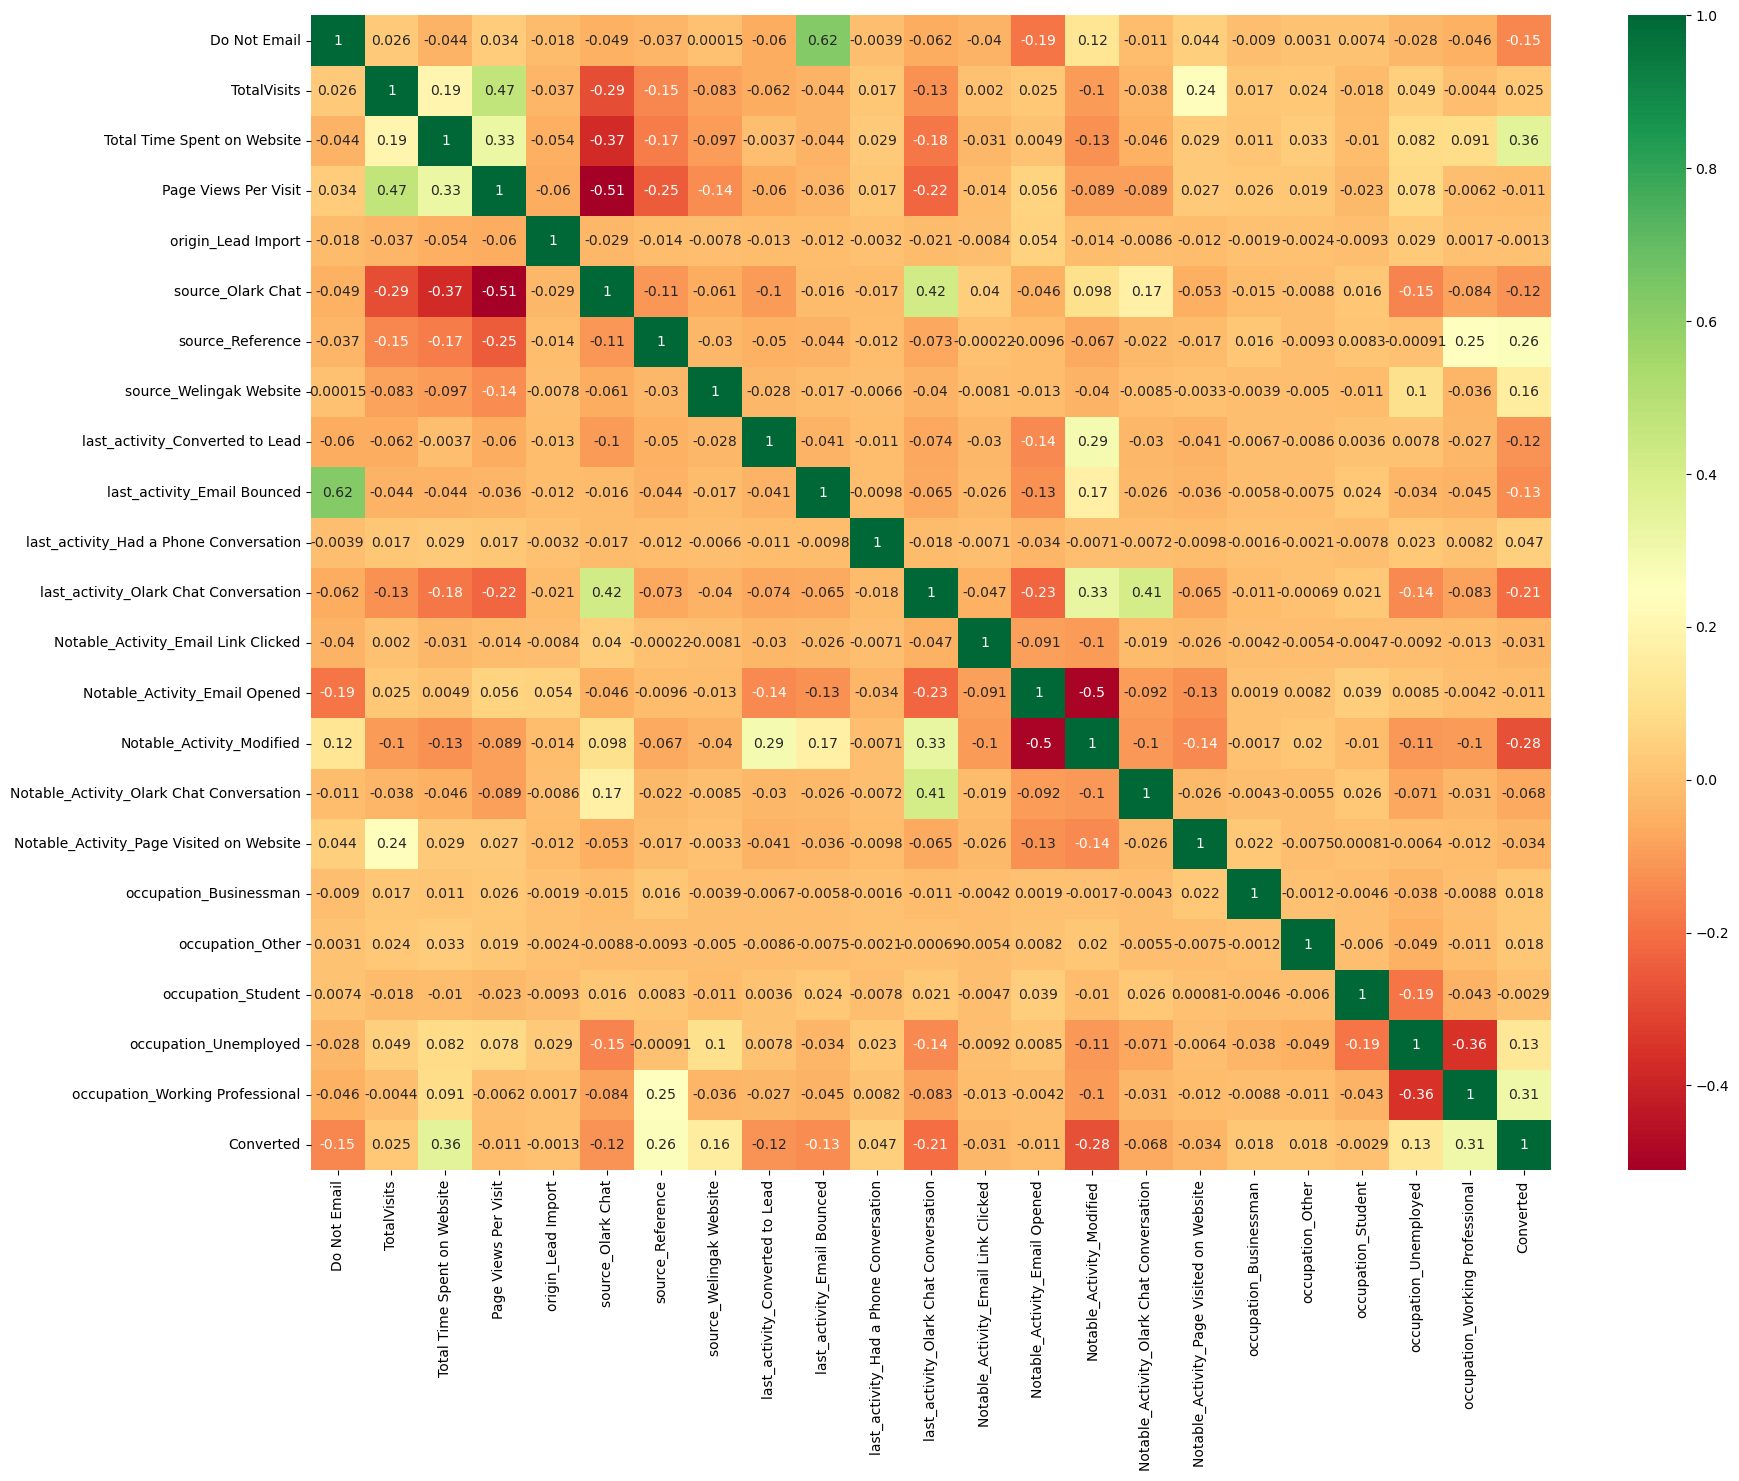

In [174]:
# checking features that contribute most towards the lead getting converted

data = X_train_sm.drop('const', axis = 1)
data['Converted'] = y_train
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn')

## **3.Prediction**

The `Variance Inflation Factor (VIF)` is used to identify the presence of ***`multicollinearity`*** in a regression analysis. It measures how much the variance of an estimated regression coefficient increases if your predictors are correlated.

In [175]:
# prediction

y_train_pred = model.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.09213801, 0.33287812, 0.30182039, ..., 0.95797819, 0.26470251,
       0.48287425])

In [176]:
# creating dataframe of actual and pred probability
y_train_pred_df = pd.DataFrame({'Actual':y_train, 'prob': y_train_pred})
y_train_pred_df.head()

,Actual,prob
0,0,0.092138
1,0,0.332878
2,0,0.301820
3,1,0.751159
4,1,0.758177


In [177]:
# Improting evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [178]:
# Defining the roc function
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize = (5,5))
    plt.plot(fpr,tpr, label = 'Roc curve (area = % 0.2f)' % auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [ 1- True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = 'lower right')
    plt.show()
    
    return None

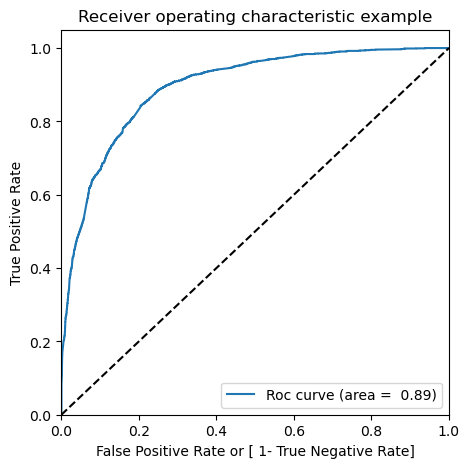

In [179]:
# plotting roc plot
draw_roc(y_train_pred_df.Actual, y_train_pred_df.prob)

In [180]:
# creating column with optimal cutoff point
numbers = [float(x)/10 for x in range(10)] + [0.35]
for i in numbers:
    y_train_pred_df[i] = y_train_pred_df.prob.map(lambda x:1 if x> i else 0)

y_train_pred_df.head()


,Actual,prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.35
0,0,0.092138,1,0,0,0,0,0,0,0,0,0,0
1,0,0.332878,1,1,1,1,0,0,0,0,0,0,0
2,0,0.301820,1,1,1,1,0,0,0,0,0,0,0
3,1,0.751159,1,1,1,1,1,1,1,1,0,0,1
4,1,0.758177,1,1,1,1,1,1,1,1,0,0,1


In [181]:
# calculating accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame(columns = ['prob', 'accuracy', 'sensi', 'speci', 'preci'])

num = [ 0.1, 0.2, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in num:
    cm = metrics.confusion_matrix(y_train_pred_df.Actual, y_train_pred_df[i])
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1])/ total
    speci = cm[0,0]/(cm[0,0] + cm[0,1])
    sensi = cm[1,1]/(cm[1,0] + cm[1,1])
    preci = cm[1,1]/(cm[0,1] + cm[1,1])
    cutoff_df.loc[i] = [i,accuracy, sensi, speci, preci]

In [182]:
print(cutoff_df)

      prob  accuracy     sensi     speci     preci
0.10  0.10  0.617226  0.980376  0.389757  0.501569
0.20  0.20  0.771217  0.917007  0.679898  0.642141
0.30  0.30  0.803653  0.875307  0.758771  0.694453
0.35  0.35  0.811683  0.847097  0.789501  0.715964
0.40  0.40  0.817037  0.785364  0.836876  0.750977
0.50  0.50  0.814675  0.701145  0.885787  0.793614
0.60  0.60  0.811526  0.637776  0.920359  0.833779
0.70  0.70  0.783341  0.524530  0.945455  0.857620
0.80  0.80  0.765864  0.443990  0.967478  0.895301
0.90  0.90  0.715320  0.282502  0.986428  0.928763


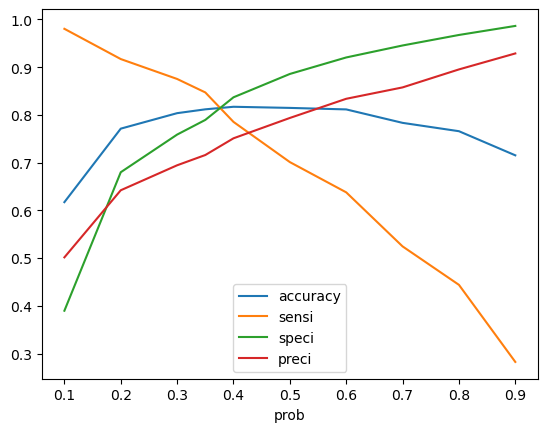

In [183]:
# plotting the probabilities

cutoff_df.plot.line(x = 'prob', y = ['accuracy', 'sensi', 'speci', 'preci'])
plt.show()

In [184]:
# Here we will choose 40% probability  above this people will be predicted as potential lead.
# Making predictions on the test set

X_test = df_test.drop('Converted', axis = 1)
y_test = df_test['Converted']

In [185]:
print(X_test.shape,y_test.shape)

(2723, 72) (2723,)


In [186]:
# scaling 
X_test[X_test.columns.to_list()] = scaler.transform(X_test[X_test.columns.to_list()])

X_test = X_test[col2]

In [187]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,origin_Lead Import,source_Olark Chat,source_Reference,source_Welingak Website,last_activity_Converted to Lead,last_activity_Email Bounced,...,Notable_Activity_Email Link Clicked,Notable_Activity_Email Opened,Notable_Activity_Modified,Notable_Activity_Olark Chat Conversation,Notable_Activity_Page Visited on Website,occupation_Businessman,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional
3271,0.0,0.015936,0.070530,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1490,0.0,0.019920,0.679695,0.208333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7936,0.0,0.007968,0.033243,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4216,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3830,0.0,0.031873,0.073675,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
# predicting y
X_test_sm = sm.add_constant(X_test)
y_test_pred = model.predict(X_test_sm)
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred

array([0.05456148, 0.97269909, 0.04913632, ..., 0.88623563, 0.08813312,
       0.06495097])

In [189]:
# Creating Dataframe
y_test_df = pd.DataFrame({'Actual':y_test, 'Probability': y_test_pred})
y_test_df['ID'] = y_test_df.index
y_test_df.index = np.arange(y_test_df.shape[0])
y_test_df['predicted'] = y_test_df.Probability.map(lambda x:1 if x > .4 else 0)
y_test_df.head()

,Actual,Probability,ID,predicted
0,0,0.054561,3271,0
1,1,0.972699,1490,1
2,0,0.049136,7936,0
3,1,0.834130,4216,1
4,0,0.049094,3830,0


In [190]:
# Evaluation on the test dataset
confusion2 = metrics.confusion_matrix(y_test_df.Actual, y_test_df.predicted)
confusion2

array([[1443,  291],
       [ 225,  764]], dtype=int64)

## **4. Accuracy, Sensitivity, Specificity & Precision**

**Accuracy**: Overall correctness of the model, calculated as the ratio of correctly predicted instances to the total instances.

**Sensitivity (Recall)**: The proportion of actual positive instances that were correctly identified by the model. It's calculated as the ratio of true positives to the sum of true positives and false negatives.

**Specificity**: The proportion of actual negative instances that were correctly identified by the model. It's calculated as the ratio of true negatives to the sum of true negatives and false positives.

**Precision**: The accuracy of positive predictions made by the model. It's calculated as the ratio of true positives to the sum of true positives and false positives.

In [191]:
# Accuracy score
metrics.accuracy_score(y_test_df.Actual, y_test_df.predicted)

0.8105031215571061

In [192]:
# sensitivity or recall
sen = confusion2[1,1] / (confusion2[1,1] + confusion2[1,0])
sen

0.7724974721941354

In [193]:
# specificity
spec = confusion2[0,0] / (confusion2[0,0] + confusion2[0,1])
spec

0.8321799307958477

In [194]:
# precision
preci = confusion2[1,1]/ (confusion2[0,1] + confusion2[1,1])
preci

0.7241706161137441